In [1]:
import tqdm
import pandas as pd
import numpy as np
from torch.nn.utils.convert_parameters import vector_to_parameters, parameters_to_vector
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def fun(x):
    return x*np.sin(x)

In [3]:
#Synthetic Data
n = 500
x = np.linspace(0, 7, n)
random.shuffle(x)
y = fun(x)# + np.random.normal(scale=5, loc=0, size=(len(x2)))

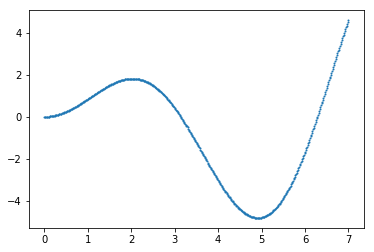

In [4]:
plt.scatter(x, y, s=1)

In [5]:
import torch
import torch.optim as optim
from torch.autograd import Variable

In [6]:
X = Variable(torch.tensor(x, dtype=torch.float)).reshape(-1, 1)
Y = Variable(torch.tensor(y, dtype=torch.float)).reshape(-1)
X.shape

torch.Size([500, 1])

In [7]:
D_in = 1
h = 20
D_out = 1

fc = torch.nn.Sequential()
fc.add_module("fc0", torch.nn.Linear(D_in, h))
fc.add_module("sig0", torch.nn.ReLU())
#fc.add_module("fc1", torch.nn.Linear(h, h))
#fc.add_module("sig1", torch.nn.ReLU())
#fc.add_module("fc2", torch.nn.Linear(h, h))
#fc.add_module("sig2", torch.nn.ReLU())
fc.add_module("fc3", torch.nn.Linear(h, D_out))
fc

Sequential(
  (fc0): Linear(in_features=1, out_features=20, bias=True)
  (sig0): ReLU()
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)

def init_weights(m):
    if type(m) == torch.nn.Linear:
        m.weight.data.fill_(1.0)
        m.bias.data.fill_(1.0)
fc.apply(init_weights)

In [8]:
for par in fc.parameters():
    print(par)

Parameter containing:
tensor([[-0.5861],
        [-0.0548],
        [ 0.1192],
        [-0.0726],
        [-0.0628],
        [ 0.7313],
        [ 0.2345],
        [ 0.1841],
        [-0.7062],
        [ 0.3458],
        [ 0.2309],
        [-0.7700],
        [ 0.5281],
        [-0.0230],
        [-0.5773],
        [-0.5197],
        [ 0.5748],
        [-0.4511],
        [ 0.2604],
        [-0.1078]])
Parameter containing:
tensor([ 0.5525, -0.9895, -0.6476,  0.5577,  0.6104,  0.5005,  0.7200,
        -0.1672, -0.5582, -0.1496,  0.8382, -0.5210,  0.8699, -0.4611,
         0.9488, -0.0904, -0.4160,  0.5319,  0.7087, -0.1195])
Parameter containing:
tensor([[ 0.0134, -0.1093,  0.1227,  0.0885, -0.2057,  0.0080, -0.1849,
          0.0810, -0.0649,  0.1462,  0.1346,  0.0832, -0.1711, -0.1297,
          0.0006, -0.2199, -0.0905, -0.2097, -0.0733,  0.0252]])
Parameter containing:
tensor([ 0.1013])


In [9]:
lr = 1e-3
optimizer = torch.optim.Adam(fc.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, amsgrad=False)
#optimizer = torch.optim.LBFGS(fc.parameters(), lr=lr)
criterion = torch.nn.MSELoss()


In [10]:
n_epoch = 20000
Loss = []
def closure():
    pred = fc(X).reshape(-1)
    loss = criterion(pred, Y)
    optimizer.zero_grad()
    loss.backward()
    return loss    
for epoch in tqdm.tqdm(range(n_epoch)):
    loss = optimizer.step(closure)
    Loss.append(loss)
    current_params = parameters_to_vector(fc.parameters())
    if any(np.isnan(current_params.data.numpy())):
        print("LBFGS optimization diverged. Rolling back update...")
        vector_to_parameters(old_params, fc.parameters())
    

100%|██████████| 20000/20000 [00:07<00:00, 2702.76it/s]


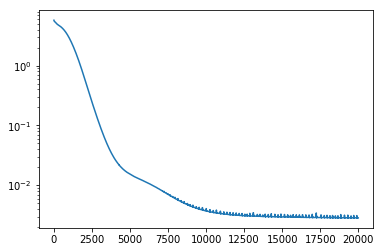

In [11]:
plt.plot(Loss)
plt.yscale('log')
plt.show()

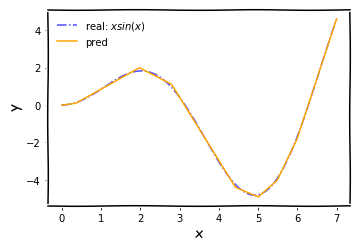

In [12]:
X_plot = torch.sort(X, dim=0)[0]
label_plot = fun(X_plot).data.numpy()
pred_plot = fc(X_plot).data.numpy()
X_plot = X_plot.data.numpy()

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.3, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

#plt.scatter(X_plot, label_plot, c='b', s=4)
plt.plot(X_plot, label_plot, c='b', alpha=0.7, linestyle='-.', label=r'real: $x sin(x)$')

#plt.scatter(X_plot, pred_plot, c='r', s=1)
plt.plot(X_plot, pred_plot, c='orange', alpha=1, label='pred')

plt.legend(frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('20n_1l.png', dpi=300, transparent=True)
#plt.show()

In [13]:
for par in fc.parameters():
    print(par)

Parameter containing:
tensor([[-0.8162],
        [-0.0548],
        [ 0.8861],
        [-0.6668],
        [-0.4579],
        [-0.1992],
        [-0.4517],
        [ 1.0455],
        [-0.7062],
        [ 1.1159],
        [-0.4076],
        [-0.7700],
        [-0.2156],
        [-0.0230],
        [-0.8067],
        [-0.5197],
        [ 1.0579],
        [-1.2345],
        [-0.5143],
        [-0.1078]])
Parameter containing:
tensor([ 4.0853, -0.9895, -3.9200,  3.9910,  3.2041,  2.8023,  3.1603,
        -0.0211, -0.5582, -0.4034,  2.8517, -0.5210,  2.8489, -0.4611,
         4.4278, -0.0904, -2.9598,  2.4441,  3.5989, -0.1195])
Parameter containing:
tensor([[ 3.3772, -0.1093,  2.8063,  3.0506, -2.4653, -0.5953, -2.4246,
          0.7579, -0.0649,  0.7890, -1.5730,  0.0832, -1.3686, -0.1297,
          3.0660, -0.2199, -2.1710, -1.8270, -2.3892,  0.0252]])
Parameter containing:
tensor([-0.8637])


In [14]:
Loss[-1]

tensor(1.00000e-03 *
       2.8462)

In [15]:
import pickle

In [16]:
pickle.dump((X_plot, label_plot, pred_plot), open( "20n_1l.p", "wb" ))